In [1]:
import requests
import time
from util.obj_funcs import load_obj, save_obj
from Models import GeneticArbitrageModel, TradeExecutionModel, ExchangeData
from APIs import KrakenAPI, KucoinAPI

In [11]:

pair = ["BTC", "USDT"]

tuple_separate = True
endpoint = "/api/v1/market/orderbook/level1"
r = requests.get(f"https://api.kucoin.com{endpoint}?symbol={pair[0]}-{pair[1]}").json()
print(r)
if r['data']:
    bid = r['data']['bestBid']
    ask = r['data']['bestAsk']
    last = r['data']['price']
    return (float(bid), float(ask), float(last))
else:
    print(r)    


{'code': '200000', 'data': {'time': 1641347589208, 'sequence': '1624476165551', 'price': '46188', 'size': '0.00076041', 'bestBid': '46187.9', 'bestBidSize': '1.1404532', 'bestAsk': '46188', 'bestAskSize': '0.25914128'}}


SyntaxError: 'return' outside function (1060146758.py, line 11)

In [ ]:
msg1 = '[1588,{"a":["38.873400",53,"53.39956000"],"b":["38.850800",54,"54.75000000"],"c":["38.873400","1.35044000"],"v":["17294.95872527","373656.15770012"],"p":["38.510320","37.239790"],"t":[990,13694],"l":["37.[548,{"a":["4572.36000",103,"103.09386923"],"b":["4572.35000",2,"2.25901810"],"c":["4572.36000","0.00428791"],"v":["1633.99178274","30950.68514225"],"p":["4575.25650","4571.83520"],"t":[1591,28624],"l":["4556.98000","4455.14000"],"h":["4608.78000","4668.00000"],"o":["4607.00000","4626.00000"]},"ticker","ETH/USD"]'
msg2 = "{'channelID': 2516, 'channelName': 'ticker', 'event': 'subscriptionStatus', 'pair': 'ALGO/ETH', 'status': 'subscribed', 'subscription': {'name': 'ticker'}}"

In [69]:
def order_volume_sizer(owned_amount, book_prices, book_sizes, p_guess=None):
    convergence_tol = .001 # The tes_volume has to be within .5% of the real_volume
    # Check how levels we need to go over to cover the test_volume, then determine the average fill price
    if not p_guess:
        p_guess = book_sizes[0]

    test_volume = p_guess / owned_amount 
    i = 0
    while sum(book_sizes[:i+1]) < test_volume:
        i += 1
        if i > len(book_sizes):
            raise Exception("Volume depth is not enough to cover required volume (You must be a damn whale)")

    remaining_volume = (test_volume - sum(book_sizes[:i]))
    fill_price = (sum([price*vol for price,vol in zip(book_prices[:i], book_sizes[:i])]) + remaining_volume*book_prices[i]) / (test_volume)
    real_volume = fill_price / owned_amount

    # Check that the real volume can be covered by the same depth as the test volume
    if real_volume > sum(book_sizes[:i+1]):
        # Repeat this process until the correct deph is found
        return order_volume_sizer(owned_amount, real_volume, book_prices, book_sizes)
    elif abs((real_volume - test_volume)/test_volume) < .005:
        return fill_price
    else:
        return order_volume_sizer(owned_amount, book_prices, book_sizes, fill_price)



In [10]:

len(load_obj("profitable_alts"))


196

In [14]:
l = [2,3,4,5,6,7]
l[1:]

[3, 4, 5, 6, 7]

In [41]:
book_prices[i]

23

In [ ]:
# Plot population size vs profits
# Plot population size vs execution time
import time

vector_length = 4
pop_size1 = 100
pop_size2 = 4000
pop_size = pop_size1
pop_sizes = []
pop_sizes1 = []
out_profits = []
times = []
while pop_size < pop_size2:
    t1 = time.time()
    profits = GA.do_evolution(vector_length, pop_size)
    elasped = time.time() - t1
    times.append(elasped)
    pop_sizes1.append(pop_size)
    
    for profit in profits:
        out_profits.append(profit)
        pop_sizes.append(pop_size)
        
    print(f"New pop size {pop_size}")
    pop_size += 100



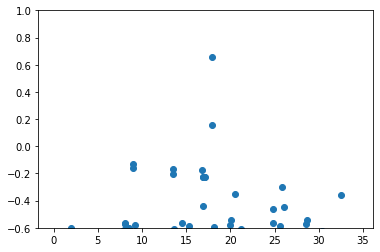

In [3]:
import matplotlib.pyplot as plt
from util import *

data = load_obj("ProfitComparison")
data['time'] = [t/60 for t in data["time"]]
data['time'] =[time*60 for time in data['time']]
plt.ylim((-.6,1))
#plt.scatter(data["time2"], data["API"])
plt.scatter(data["time"], data["GA"])

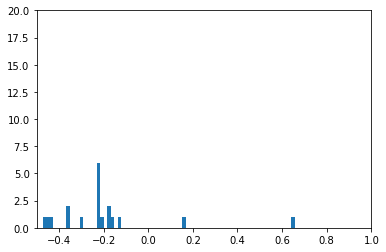

In [4]:

plt.xlim((-.5,1))
plt.ylim((0,20))

a= plt.hist(data['GA'], bins = 100)

In [4]:
winners = load_obj("winning_alts")
len(winners)

191

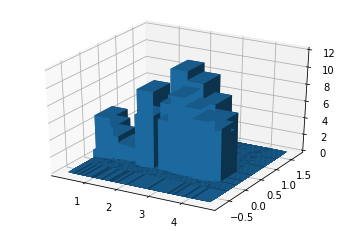

In [103]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import interactive
interactive(True)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(data['time'], data['GA'], bins=50, range=[[0, 4], [-1, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')


plt.show()

In [102]:
%matplotlib inline